# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:

%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI

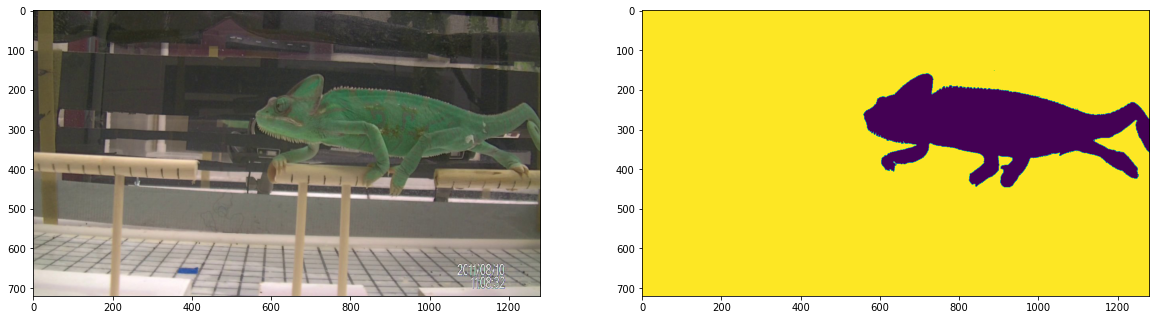

In [2]:
import imageio

img = imageio.imread('Image_data/Examples/AA_Chameleon.jpg')
gmask = imageio.imread('Image_data/Examples/AA_Chameleon_GT.png')

fig = plt.figure(figsize=(20, 20))
my_ax = fig.add_subplot(1, 2, 1)
my_ax.imshow(img)
my_ax = fig.add_subplot(1, 2, 2)
my_ax.imshow(gmask)

In [62]:
from see import base_classes

# put data in a pipeline
data = base_classes.pipedata()
data.img = img
data.gmask = gmask

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [4]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [5]:
#TODO This needs to be fixed Using the new syntax.
#my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)
my_evolver = GeneticSearch.Evolver(workflow, data, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [6]:
x = Segmentors.SlicO()

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=10)

Initializing a new random population
Generation 0/10 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = True
	channel = 2
	algorithm = MorphGeodesicActiveContour
	alpha1 = 0.6484375
	alpha2 = 0.76171875
	beta1 = 0.55859375
	beta2 = 0.1328125
	gamma1 = 0.7421875
	gamma2 = 0.87890625
	n_segments = 5
	max_num_iter = 9

Time: 2.357 s
fitness=1

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Slic
	alpha1 = 0.6015625
	alpha2 = 0.30078125
	beta1 = 0.76171875
	beta2 = 0.015625
	gamma1 = 0.63671875
	gamma2 = 0.7734375
	n_segments = 9
	max_num_iter = 17

Time: 0.935 s
fitness=0.837354573716734

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = False
	channel = 0
	algorithm = SlicO
	alpha1 = 0.26953125
	alpha2 = 0.9765625
	beta1 = 0.0625
	beta2 = 0.1953125
	gamma1 = 0.6953125
	gamma2 = 0.93359375
	n_segments = 2
	max_num_iter = 13

Time: 0.93 s
fitness

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [8]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

Best Individual:
 ['HSV', True, 0, 'ColorThreshold', 0.3203125, 0.64453125, 0.875, 0.8828125, 0.1953125, 0.98828125, 2, 3]


In [9]:
my_evolver.hof[0:5]

[['HSV',
  True,
  0,
  'ColorThreshold',
  0.3203125,
  0.64453125,
  0.875,
  0.8828125,
  0.1953125,
  0.98828125,
  2,
  3],
 ['YDbDr',
  False,
  2,
  'Slic',
  0.6015625,
  0.30078125,
  0.76171875,
  0.015625,
  0.63671875,
  0.06640625,
  9,
  17],
 ['YDbDr',
  False,
  2,
  'Slic',
  0.6015625,
  0.30078125,
  0.76171875,
  0.015625,
  0.63671875,
  0.7734375,
  9,
  17],
 ['YDbDr',
  False,
  2,
  'SlicO',
  0.5,
  0.0703125,
  0.30078125,
  0.48046875,
  0.76171875,
  0.7734375,
  7,
  6],
 ['YDbDr',
  False,
  2,
  'SlicO',
  0.5,
  0.0703125,
  0.30078125,
  0.48046875,
  0.76171875,
  0.96875,
  7,
  6]]

We can see the mask this individual generates by evaluating it, then plotting the result:

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.3203125
	alpha2 = 0.64453125
	beta1 = 0.875
	beta2 = 0.8828125
	gamma1 = 0.1953125
	gamma2 = 0.98828125
	n_segments = 2
	max_num_iter = 3

Time: 0.842 s


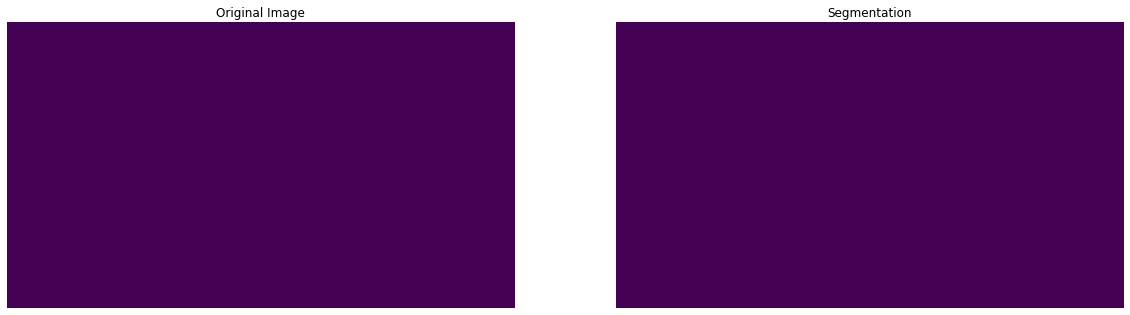

In [49]:
seg = workflow(my_evolver.hof[0])
data1 = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data1.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data1.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.3203125
	alpha2 = 0.64453125
	beta1 = 0.875
	beta2 = 0.8828125
	gamma1 = 0.1953125
	gamma2 = 0.98828125
	n_segments = 2
	max_num_iter = 3

Time: 0.624 s


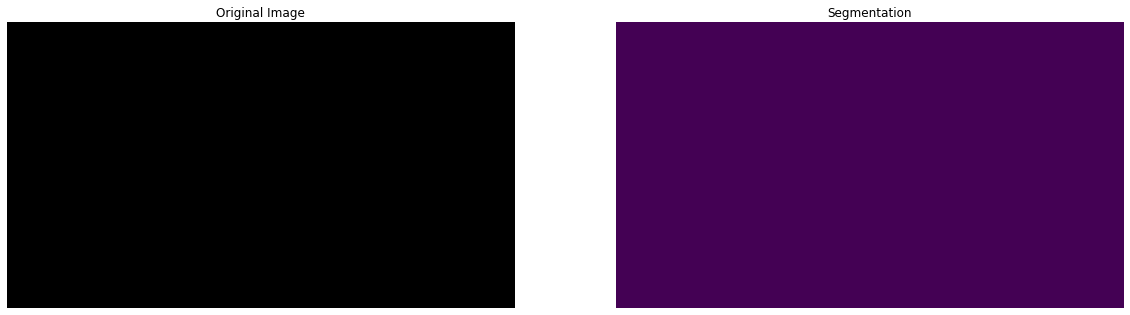

In [50]:
seg = workflow(params)
data = seg.runAlgo(data)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(data.mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [64]:
import copy

In [63]:
print('Fitness Value: ', data.fitness)
import copy

AttributeError: 'pipedata' object has no attribute 'fitness'

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.3203125
	alpha2 = 0.64453125
	beta1 = 0.875
	beta2 = 0.8828125
	gamma1 = 0.1953125
	gamma2 = 0.98828125
	n_segments = 2
	max_num_iter = 3

Time: 0.828 s
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Slic
	alpha1 = 0.6015625
	alpha2 = 0.30078125
	beta1 = 0.76171875
	beta2 = 0.015625
	gamma1 = 0.63671875
	gamma2 = 0.06640625
	n_segments = 9
	max_num_iter = 17

Time: 0.992 s
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Slic
	alpha1 = 0.6015625
	alpha2 = 0.30078125
	beta1 = 0.76171875
	beta2 = 0.015625
	gamma1 = 0.63671875
	gamma2 = 0.7734375
	n_segments = 9
	max_num_iter = 17

Time: 0.943 s
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = SlicO
	alpha1 = 0.5


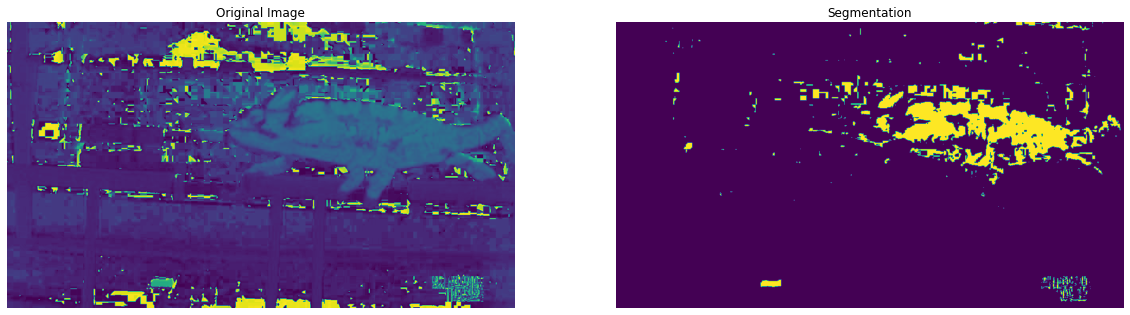

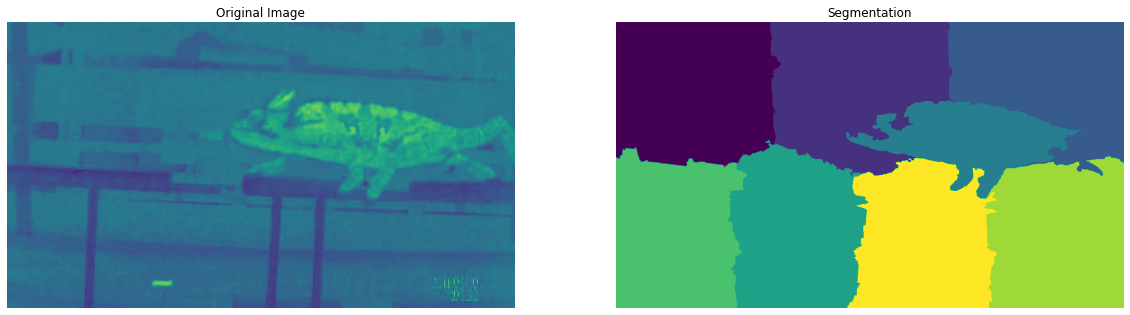

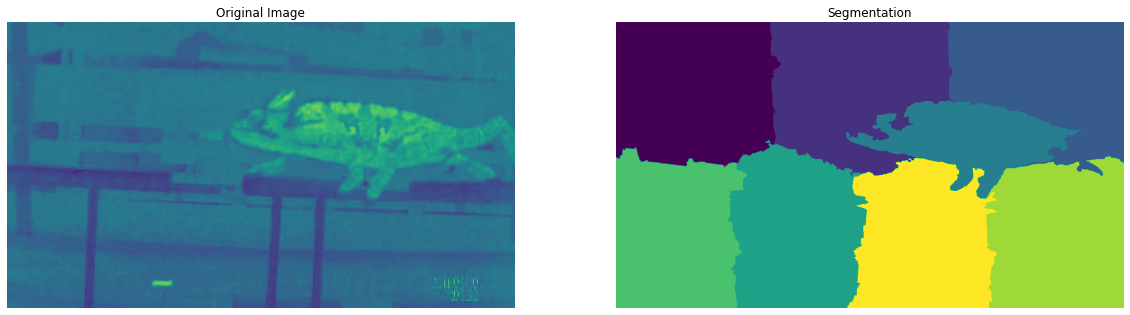

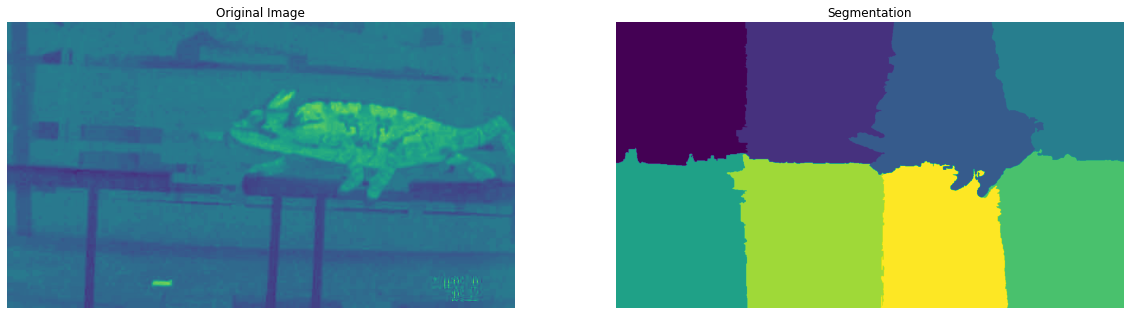

In [66]:
datas=[copy.deepcopy(data) for i in range(4)]
segs=[workflow(i) for i in my_evolver.hof[0:4]]
datas=[segs[i].runAlgo(datas[i]) for i in range(len(segs))]

for i in datas:
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(i.img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(i.mask)
    plt.title("Segmentation")
    plt.axis('off')

    plt.tight_layout
    plt.show()

In [74]:
from see.Segment_Fitness import FitnessFunction
FitnessFunction(datas[3].mask,datas[1].mask)

[0.16188151041666668, 8, 8]

In [ ]:
def GeneratePairs(size):
    pairs=[]
    for i in range(size):
        for j in range(i+1,size):
            pairs.append([i,j])
    return pairs
GeneratePairs(4)
def UncertaintyValue(segmenters,data):
    dataCopies=[copy.deepcopy(data) for i in range(len(segmenters))]
    segs=[workflow(i) for i in segmenters]
    dataCopies=[segs[i].runAlgo(dataCopies[i]) for i in range(len(segs))]
    uncertainty=mean([FitnessFunction(dataCopies[i[0]],dataCopies[i[1]]) for i in GeneratePairs(len(dataCopies))])
    return uncertainty

UncertaintyValue(my_evolver.hof[0:4],data)

<class 'see.Workflow.workflow'> parameters: 
	colorspace = HSV
	multichannel = True
	channel = 0
	algorithm = ColorThreshold
	alpha1 = 0.3203125
	alpha2 = 0.64453125
	beta1 = 0.875
	beta2 = 0.8828125
	gamma1 = 0.1953125
	gamma2 = 0.98828125
	n_segments = 2
	max_num_iter = 3

Time: 0.868 s
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Slic
	alpha1 = 0.6015625
	alpha2 = 0.30078125
	beta1 = 0.76171875
	beta2 = 0.015625
	gamma1 = 0.63671875
	gamma2 = 0.06640625
	n_segments = 9
	max_num_iter = 17

Time: 0.995 s
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = Slic
	alpha1 = 0.6015625
	alpha2 = 0.30078125
	beta1 = 0.76171875
	beta2 = 0.015625
	gamma1 = 0.63671875
	gamma2 = 0.7734375
	n_segments = 9
	max_num_iter = 17

Time: 0.998 s
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YDbDr
	multichannel = False
	channel = 2
	algorithm = SlicO
	alpha1 = 0.5
